# Analysis of Product Performance and Sales Trends in Amazon 

Objective: This analysis seeks to evaluate product performance in the Amazon dataset by examining total sales volume, average pricing, and discount strategies. Additionally, it aims to analyze the impact of customer ratings and product specifications on sales outcomes.

# Platform Information

In [1]:
# Platform and Environment Information
import platform
import sys

print("Python version:", sys.version)
print("Platform:", platform.system())
print("Platform Release:", platform.release())

Python version: 3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]
Platform: Windows
Platform Release: 10


# Problem Statement and Solution Approach

## Problem Statement
This analysis aims to explore and compare the sales performance of overlapping product categories between Amazon and Flipkart. We will assess metrics such as total sales volume, average pricing, discount strategies, and fulfillment methods. The analysis will also evaluate whether customer ratings and product specifications on Flipkart impact sales outcomes on Amazon.

## Solution Approach
1. Data Cleaning and Preparation
2. Feature Engineering and Scaling
3. Univariate, Bivariate, and Multivariate Analysis
4. Visualization of Key Trends
5. Comparative Analysis of Metrics


In [2]:
# Required Libraries and Their Versions
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

## Methods
1. **Data Cleaning**: Removing unnecessary columns and handling missing values.
2. **Feature Engineering**: Creating new metrics like discount percentage for deeper analysis.
3. **Univariate Analysis**: Analyzing individual variables, such as average pricing and sales volume.
4. **Bivariate Analysis**: Exploring relationships between pairs of variables (e.g., sales vs. discount).
5. **Multivariate Analysis**: Investigating relationships between three or more variables.
6. **Visualization**: Graphical representation of data for easier comparison and understanding.
7. **Comparative Analysis**: Comparing key metrics between Amazon and Flipkart.


# Dataset Description

This dataset provides detailed insights into Amazon sales data, including SKU Code, Design Number, Stock, Category, Size and Color, to help optimize product profitability

Category: Type of product. (String)

Size: Size of the product. (String)

Date: Date of the sale. (Date)

Status: Status of the sale. (String)

Fulfilment: Method of fulfilment. (String)

Style: Style of the product. (String)

SKU: Stock Keeping Unit. (String)

ASIN: Amazon Standard Identification Number. (String)

Courier Status: Status of the courier. (String)

Qty: Quantity of the product. (Integer)

Amount: Amount of the sale. (Float)

B2B: Business to business sale. (Boolean)

Currency: The currency used for the sale. (String)

# Load and Display Amazon Data

In [3]:
# Load Amazon Dataset
df_amazon = pd.read_csv('Amazon Sale Report.csv', low_memory=False)

In [4]:
df_amazon.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [5]:
# Display basic information about the dataset
print("Amazon Data Overview:")
df_amazon.info()

Amazon Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount      

# Amazon Data Cleaning 

# Handling missing values

In [6]:
# Check for missing values in the dataset
print("Missing Values in Amazon Dataset:")
print(df_amazon.isnull().sum())

Missing Values in Amazon Dataset:
index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64


In [7]:
print(df_amazon.isnull().sum()*100/len(df_amazon))

index                  0.000000
Order ID               0.000000
Date                   0.000000
Status                 0.000000
Fulfilment             0.000000
Sales Channel          0.000000
ship-service-level     0.000000
Style                  0.000000
SKU                    0.000000
Category               0.000000
Size                   0.000000
ASIN                   0.000000
Courier Status         5.328164
Qty                    0.000000
currency               6.043807
Amount                 6.043807
ship-city              0.025586
ship-state             0.025586
ship-postal-code       0.025586
ship-country           0.025586
promotion-ids         38.110487
B2B                    0.000000
fulfilled-by          69.546811
Unnamed: 22           38.030626
dtype: float64


In [8]:
# Replace missing numerical values
df_amazon['Amount'].fillna(df_amazon['Amount'].median(), inplace=True)

# Replace missing categorical values
df_amazon['Courier Status'].fillna('Unknown', inplace=True)
df_amazon['currency'].fillna(df_amazon['currency'].mode()[0], inplace=True)
df_amazon['ship-city'].fillna(df_amazon['ship-city'].mode()[0], inplace=True)
df_amazon['ship-state'].fillna(df_amazon['ship-state'].mode()[0], inplace=True)
df_amazon['ship-country'].fillna(df_amazon['ship-country'].mode()[0], inplace=True)
df_amazon['promotion-ids'].fillna('None', inplace=True)
df_amazon['fulfilled-by'].fillna('Unknown', inplace=True)

# Drop rows with missing ship-postal-code
df_amazon.dropna(subset=['ship-postal-code'], inplace=True)

# Drop irrelevant column
df_amazon.drop(columns=['Unnamed: 22'], inplace=True)

# Verify the changes
print("Missing values after handling:")
print(df_amazon.isnull().sum())


Missing values after handling:
index                 0
Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Style                 0
SKU                   0
Category              0
Size                  0
ASIN                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
promotion-ids         0
B2B                   0
fulfilled-by          0
dtype: int64


In [9]:
df_amazon.dtypes

index                   int64
Order ID               object
Date                   object
Status                 object
Fulfilment             object
Sales Channel          object
ship-service-level     object
Style                  object
SKU                    object
Category               object
Size                   object
ASIN                   object
Courier Status         object
Qty                     int64
currency               object
Amount                float64
ship-city              object
ship-state             object
ship-postal-code      float64
ship-country           object
promotion-ids          object
B2B                      bool
fulfilled-by           object
dtype: object

# Change Columns to Their Appropriate Data Types

In [10]:
# Convert 'Date' to datetime format
df_amazon['Date'] = pd.to_datetime(df_amazon['Date'], errors='coerce')

# Print the columns to check which categorical columns are present
print(df_amazon.columns)

# Adjust the list of categorical columns based on the existing columns
categorical_columns = ['Status', 'Fulfilment', 'Sales Channel', 'ship-service-level',
                       'Style', 'SKU', 'Category', 'Size', 'ASIN', 'Courier Status',
                       'currency', 'ship-city', 'ship-state', 'ship-country', 'promotion-ids', 'fulfilled-by']

# Filter out any columns that do not exist in df_amazon
categorical_columns = [col for col in categorical_columns if col in df_amazon.columns]

# Convert categorical columns to category type
df_amazon[categorical_columns] = df_amazon[categorical_columns].astype('category')

# Ensure numerical columns have the correct type
df_amazon['Qty'] = df_amazon['Qty'].astype(int)
df_amazon['Amount'] = df_amazon['Amount'].astype(float)
df_amazon['ship-postal-code'] = df_amazon['ship-postal-code'].fillna(0).astype(int)


Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by'],
      dtype='object')


In [11]:
df_amazon.dtypes

index                          int64
Order ID                      object
Date                  datetime64[ns]
Status                      category
Fulfilment                  category
Sales Channel                 object
ship-service-level          category
Style                       category
SKU                         category
Category                    category
Size                        category
ASIN                        category
Courier Status              category
Qty                            int32
currency                    category
Amount                       float64
ship-city                   category
ship-state                  category
ship-postal-code               int32
ship-country                category
promotion-ids               category
B2B                             bool
fulfilled-by                category
dtype: object

# Handling Duplicates

In [12]:
# Finding duplicate rows.
duplicates = df_amazon.duplicated()

if duplicates.any():
    print("Duplicates are present.")
    print("\nDuplicate Rows:")
    print(duplicates)
else:
    print("No duplicates found.")

No duplicates found.


# Handling Outliers

In [13]:
# First, extract all numerical columns to focus the outlier detection process:
# Select only numerical columns
numerical_columns = df_amazon.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Columns:", numerical_columns)

# Display summary statistics for numerical columns
print(df_amazon[numerical_columns].describe())

# Detect outliers using IQR
outliers = {}
for column in numerical_columns:
    q1 = df_amazon[column].quantile(0.25)
    q3 = df_amazon[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Identify outliers
    outliers[column] = df_amazon[(df_amazon[column] < lower_bound) | (df_amazon[column] > upper_bound)][column]

    print(f"{column}: Found {len(outliers[column])} outliers")


Numerical Columns: Index(['index', 'Amount'], dtype='object')
               index         Amount
count  128942.000000  128942.000000
mean    64487.184920     645.939820
std     37230.924392     272.789042
min         0.000000       0.000000
25%     32246.250000     459.000000
50%     64485.500000     605.000000
75%     96730.750000     771.000000
max    128974.000000    5584.000000
index: Found 0 outliers
Amount: Found 4176 outliers


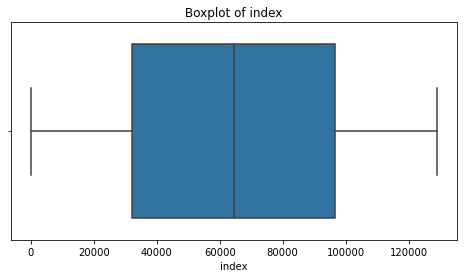

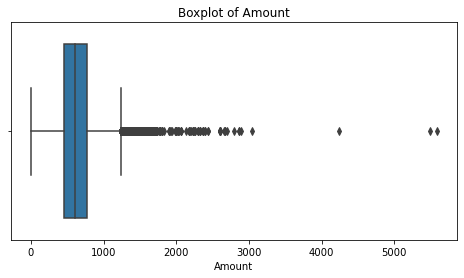

In [14]:
# Plot boxplots for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_amazon[column])
    plt.title(f"Boxplot of {column}")
    plt.show()

In [15]:
for column in numerical_columns:
    q1 = df_amazon[column].quantile(0.25)
    q3 = df_amazon[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Cap outliers
    df_amazon[column] = np.where(df_amazon[column] < lower_bound, lower_bound,
                                 np.where(df_amazon[column] > upper_bound, upper_bound, df_amazon[column]))


# Feature Engineering

In [16]:
# Create fulfillment type indicator using np.where
df_amazon['Fulfilment_Type'] = np.where(df_amazon['Fulfilment'].str.contains('Easy Ship', na=False), 'Easy Ship', 'Other')

def determine_fulfilment_type(fulfilment):
    if 'Easy Ship' in fulfilment:
        return 'Easy Ship'
    else:
        return 'Other'

# Create fulfillment type indicator using a defined function
df_amazon['Fulfilment_Type'] = df_amazon['Fulfilment'].apply(determine_fulfilment_type)

# Feature Scaling

In [17]:
from sklearn.preprocessing import StandardScaler

# Scale 'Amount' and 'Qty'
scaler = StandardScaler()
df_amazon[['Amount', 'Qty']] = scaler.fit_transform(df_amazon[['Amount', 'Qty']])

# Target Variable Approach

In [18]:
def determine_sales_success(status):
    if 'Shipped' in status:
        return 1
    else:
        return 0

# Create Sales_Success column by applying the defined function
df_amazon['Sales_Success'] = df_amazon['Status'].apply(determine_sales_success)

# Remove Unnecessary Columns

In [19]:
columns_to_drop = ['index', 'promotion-ids', 'ship-postal-code']  
df_amazon.drop(columns=columns_to_drop, inplace=True)

In [20]:
df_amazon.head()

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,Qty,currency,Amount,ship-city,ship-state,ship-country,B2B,fulfilled-by,Fulfilment_Type,Sales_Success
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,...,-2.886479,INR,0.028514,MUMBAI,MAHARASHTRA,IN,False,Easy Ship,Other,0
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,...,0.304956,INR,-0.914802,BENGALURU,KARNATAKA,IN,False,Easy Ship,Other,1
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,...,0.304956,INR,-1.215420,NAVI MUMBAI,MAHARASHTRA,IN,True,Unknown,Other,1
3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,...,-2.886479,INR,0.441219,PUDUCHERRY,PUDUCHERRY,IN,False,Easy Ship,Other,0
4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,...,0.304956,INR,-0.258908,CHENNAI,TAMIL NADU,IN,False,Unknown,Other,1


# Univariate Analysis

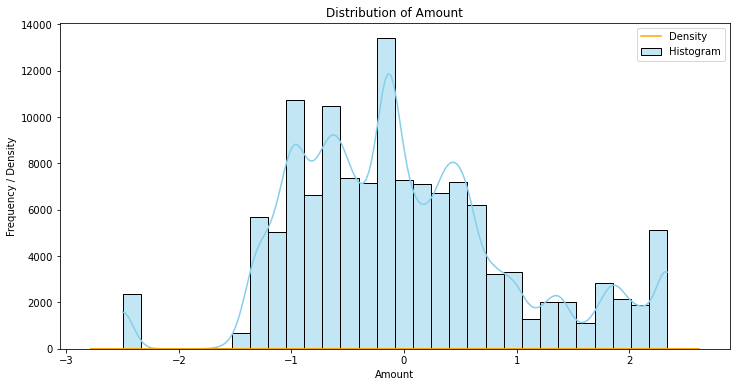

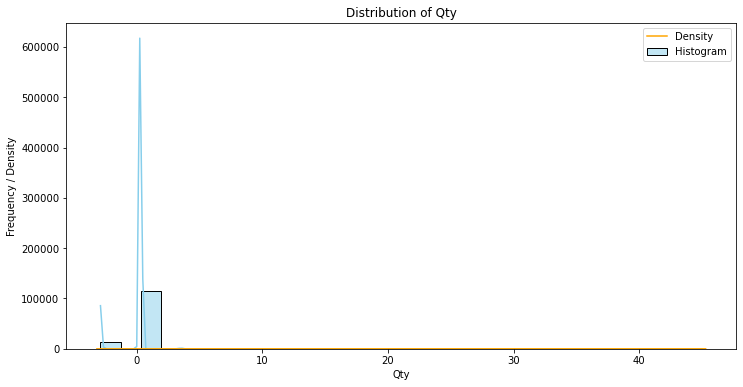

In [21]:
numerical_columns = ['Amount', 'Qty']

for column in numerical_columns:
    plt.figure(figsize=(12, 6))
    # Use a different color for histogram and KDE
    sns.histplot(df_amazon[column], kde=True, bins=30, color='skyblue', label='Histogram')
    sns.kdeplot(df_amazon[column], color='orange', label='Density')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency / Density')
    plt.legend()
    plt.show()


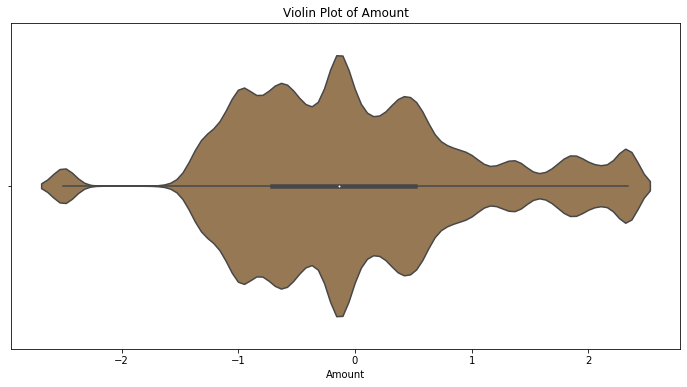

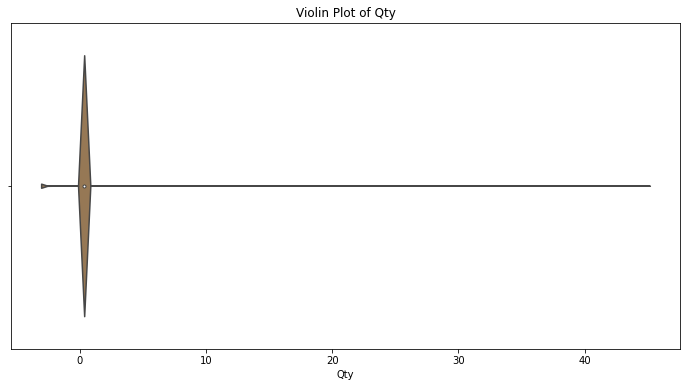

In [22]:
for column in numerical_columns:
    plt.figure(figsize=(12, 6))
    sns.violinplot(data=df_amazon, x=column, palette='cubehelix')
    plt.title(f'Violin Plot of {column}')
    plt.xlabel(column)
    plt.show()


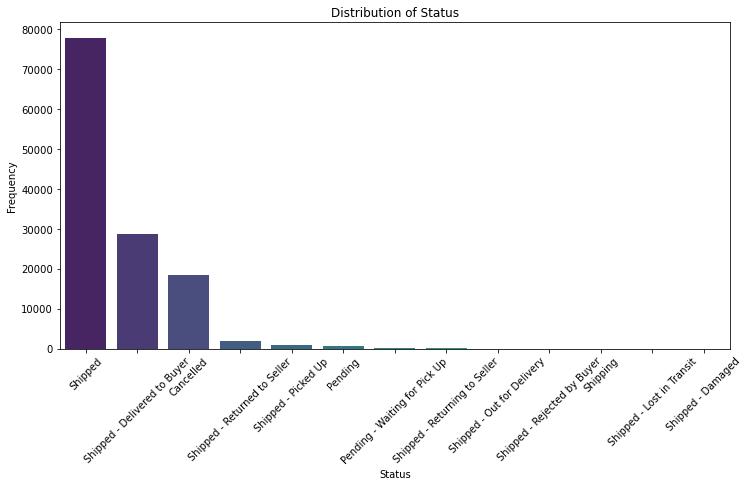

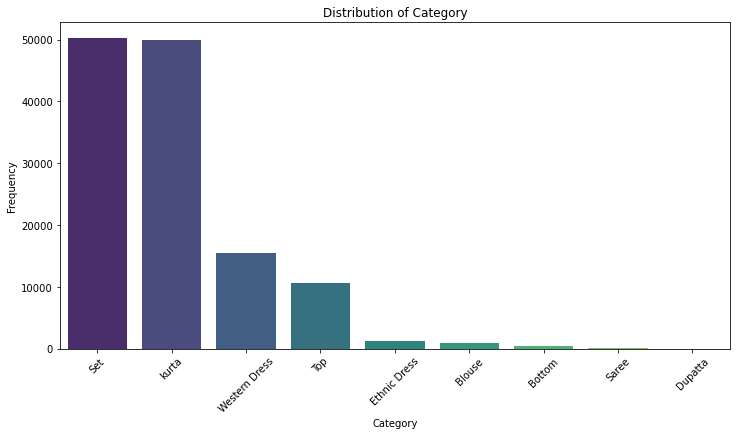

In [23]:
categorical_columns = ['Status', 'Category']

for column in categorical_columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df_amazon, x=column, order=df_amazon[column].value_counts().index, palette='viridis')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()


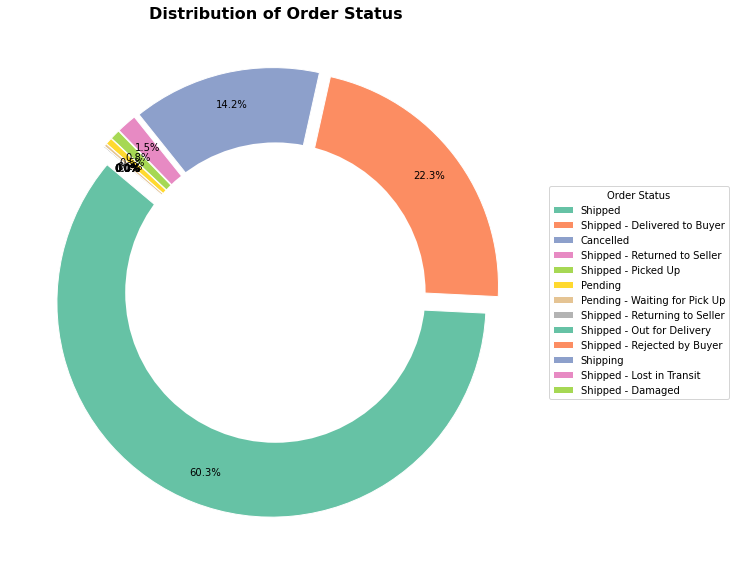

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate value counts for the 'Status' column
status_counts = df_amazon['Status'].value_counts()

# Plot the pie chart
plt.figure(figsize=(12, 8))  # Increase figure size for better visibility
colors = sns.color_palette('Set2', len(status_counts))  # Use a distinct color palette
explode = [0.05] * len(status_counts)  # Slightly "explode" all slices

# Create the pie chart with labels outside the slices
wedges, texts, autotexts = plt.pie(
    status_counts,
    labels=None,  # Remove default labels
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    explode=explode,
    pctdistance=0.85,  # Position of percentage text
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}  # Add borders between slices
)

# Add a legend for the labels
plt.legend(
    wedges, 
    status_counts.index, 
    title='Order Status', 
    loc='center left', 
    bbox_to_anchor=(1, 0.5),  # Position the legend outside the chart
    fontsize=10
)

# Add a circle in the center to create a donut chart (optional)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)

# Add title and improve layout
plt.title('Distribution of Order Status', fontsize=16, weight='bold')
plt.tight_layout()  # Ensure proper spacing
plt.show()


# Bivariate Analysis

# Relationship Between Quantity Sold and Total Amount

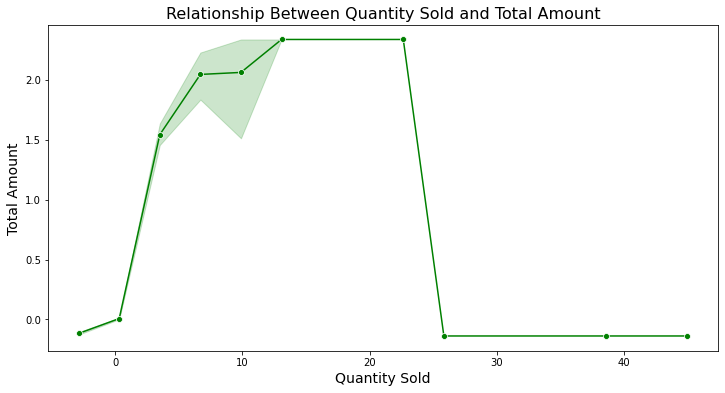

In [25]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Qty', y='Amount', data=df_amazon, color='green', marker='o')
plt.title('Relationship Between Quantity Sold and Total Amount', fontsize=16)
plt.xlabel('Quantity Sold', fontsize=14)
plt.ylabel('Total Amount', fontsize=14)
plt.show()


# Total Amount Sold Across Different Product Categories

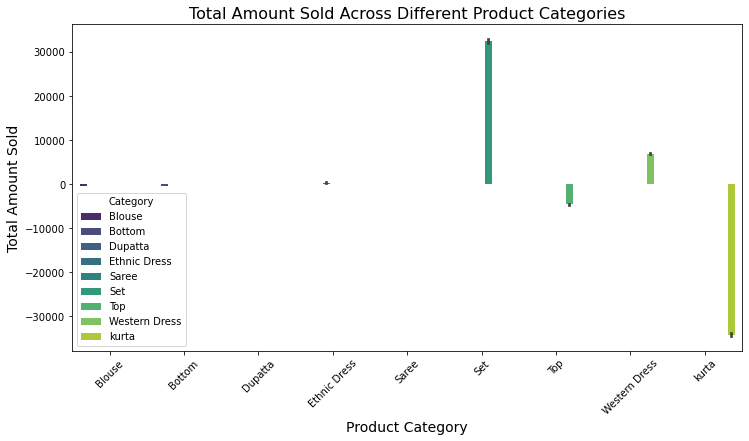

In [26]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Amount', data=df_amazon, estimator=np.sum, hue='Category', palette='viridis')
plt.title('Total Amount Sold Across Different Product Categories', fontsize=16)
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Total Amount Sold', fontsize=14)
plt.xticks(rotation=45)
plt.show()


# Understanding Relationships Between Key Variables

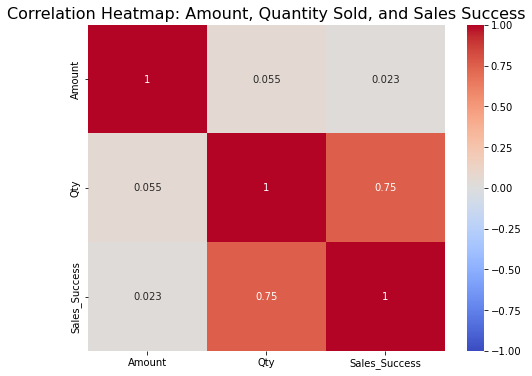

In [27]:
# Selecting multiple continuous variables for correlation analysis
correlation_matrix = df_amazon[['Amount', 'Qty', 'Sales_Success']].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap: Amount, Quantity Sold, and Sales Success', fontsize=16)
plt.show()


#  Amount vs Sales Success

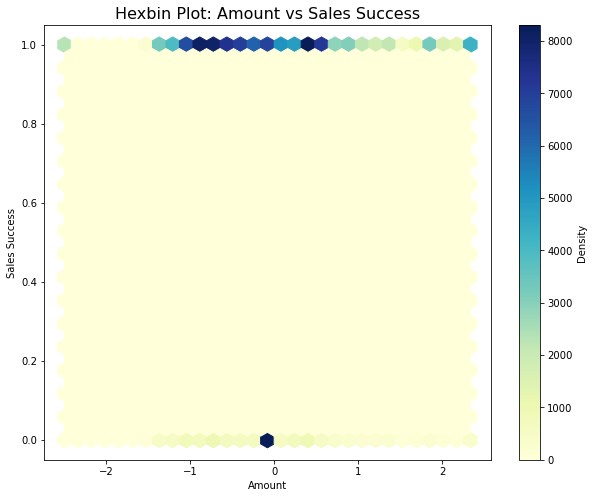

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Hexbin Plot: Exploring the Relationship Between Amount and Sales Success
plt.figure(figsize=(10, 8))
plt.hexbin(df_amazon['Amount'], df_amazon['Sales_Success'], gridsize=30, cmap='YlGnBu')  # Choose a color palette
plt.colorbar(label='Density')

# Adding labels and title
plt.xlabel('Amount')
plt.ylabel('Sales Success')
plt.title('Hexbin Plot: Amount vs Sales Success', fontsize=16)

# Display the plot
plt.show()


# Sales Amount by Fulfilment Status

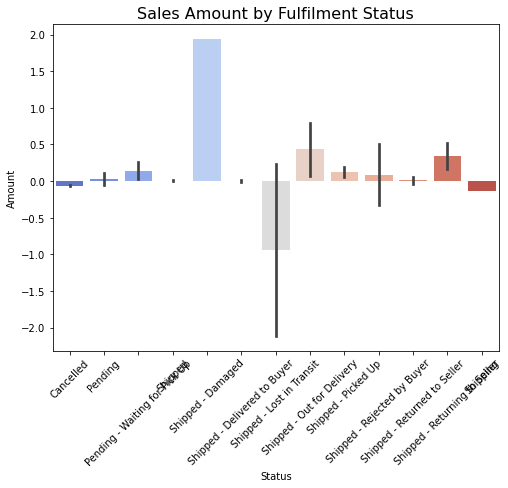

In [29]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Status', y='Amount', data=df_amazon, palette='coolwarm')
plt.title('Sales Amount by Fulfilment Status', fontsize=16)
plt.xticks(rotation=45)
plt.show()


# Pairwise Relationships

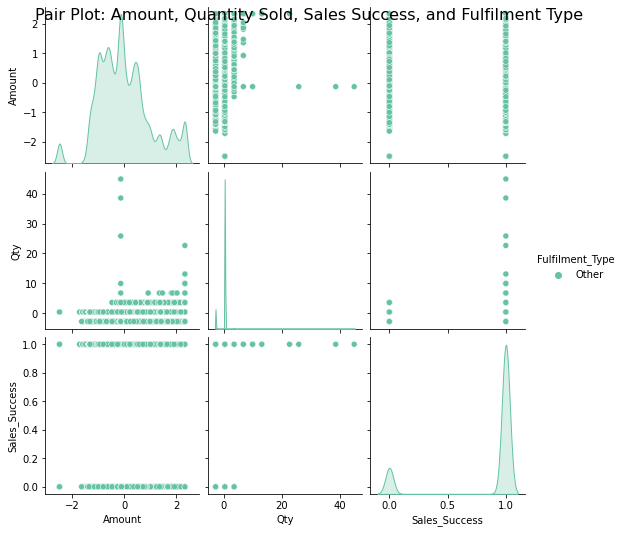

In [30]:
sns.pairplot(df_amazon[['Amount', 'Qty', 'Sales_Success', 'Fulfilment_Type']], kind='scatter', hue='Fulfilment_Type', palette='Set2')
plt.suptitle('Pair Plot: Amount, Quantity Sold, Sales Success, and Fulfilment Type', fontsize=16)
plt.show()

# Multivariate analysis

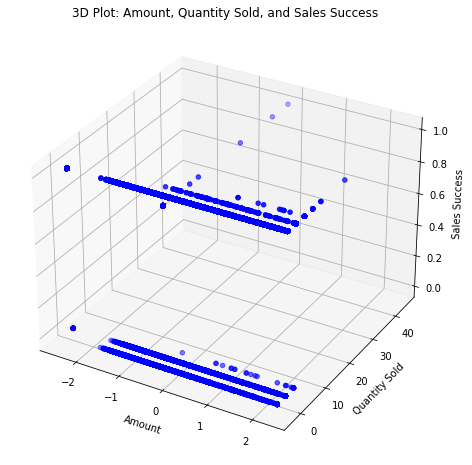

In [31]:
from mpl_toolkits.mplot3d import Axes3D

# Creating a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting with Amount, Qty, and Sales Success
ax.scatter(df_amazon['Amount'], df_amazon['Qty'], df_amazon['Sales_Success'], c='b', marker='o')

ax.set_xlabel('Amount')
ax.set_ylabel('Quantity Sold')
ax.set_zlabel('Sales Success')

plt.title('3D Plot: Amount, Quantity Sold, and Sales Success')
plt.show()


# Principal Component Analysis (PCA) (for dimensionality reduction)

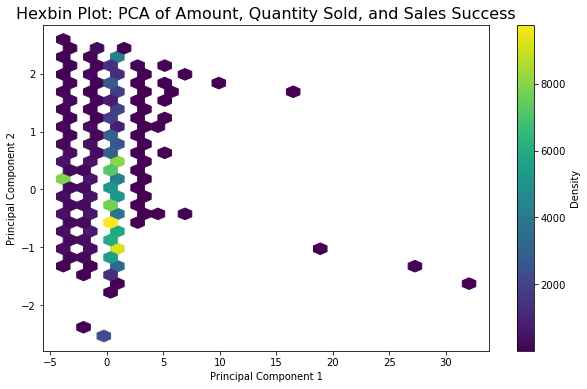

In [32]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Selecting continuous variables
X = df_amazon[['Amount', 'Qty', 'Sales_Success']].dropna()

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Creating a DataFrame for the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Plotting the Hexbin Plot with a smooth and effective palette
plt.figure(figsize=(10, 6))
plt.hexbin(pca_df['PC1'], pca_df['PC2'], gridsize=30, cmap='viridis', mincnt=1)

# Adding color bar, title, and labels
plt.colorbar(label='Density')
plt.title('Hexbin Plot: PCA of Amount, Quantity Sold, and Sales Success', fontsize=16)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Display the plot
plt.show()


# Conclusion: Amazon Sales Trends Analysis

Top Sellers: Sarees and Kurtas dominate; western categories show growth potential.

Revenue Drivers: Mid-range quantities (10-15 units) maximize profits.

Underperforming Items: Low sales in Dupatta, Scarf, and Blouse need attention.

Order Issues: High cancellations (14.2%) highlight operational inefficiencies.

Sales Insights: Smaller transactions drive success; focus on improving high-value sales.

Actionable Steps: Enhance popular categories, address returns/cancellations, and explore niche markets for growth.

Streamlining operations and targeting market needs can boost Amazon's profitability and efficiency.